In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
# ID for randomizing order
np.random.seed(5)

# Create synthetic data
n_samples = 1000
n_features = 2        # number of feature columns
n_components = 2      # number of unique classes (i.e, clusters)

"""
X_1 (Income) | X_2 (Skills) | Z (Class)
120k      10      2             A
80k       7       1             B
20m       3       3             A
"""

'\nX_1 (Income) | X_2 (Skills) | Z (Class)\n120k      10      2             A\n80k       7       1             B\n20m       3       3             A\n'

Parameters of $X_1$
- $\mu_1$ is the mean average of $X_1$
- $\mathbf{\Sigma}_1$ is the covariance matrix of $X_1$
- $X_1$ is the first feature

In [ ]:
# Parameters for X_1
mean_1 = np.array([0, 0])
cov_1 = np.array(
    [
      [1, 0],
      [0, 1]
    ]
)
X_1 = np.random.multivariate_normal(mean_1, cov_1, n_samples)

In [ ]:
# Parameters for X_2
mean_2 = np.array([0, 0])
cov_2 = np.array(
    [
      [1, 0],
      [0, 1]
    ]
)
X_2 = np.random.multivariate_normal(mean_2, cov_2, n_samples)

In [ ]:
print(X_1)

[[ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 ...
 [-0.61818034  1.39191346]
 [ 0.62061348  0.7042333 ]
 [-1.18573437 -3.50747462]]


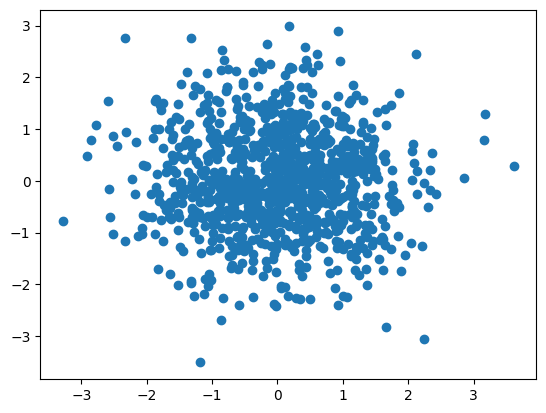

In [ ]:
plt.scatter(X_1[:, 0],X_1[:, 1])

(array([  2.,  15.,  34., 113., 231., 255., 195., 106.,  39.,  10.]),
 array([-3.50747462, -2.85858669, -2.20969876, -1.56081083, -0.9119229 ,
        -0.26303497,  0.38585296,  1.03474089,  1.68362882,  2.33251675,
         2.98140467]),
 <BarContainer object of 10 artists>)

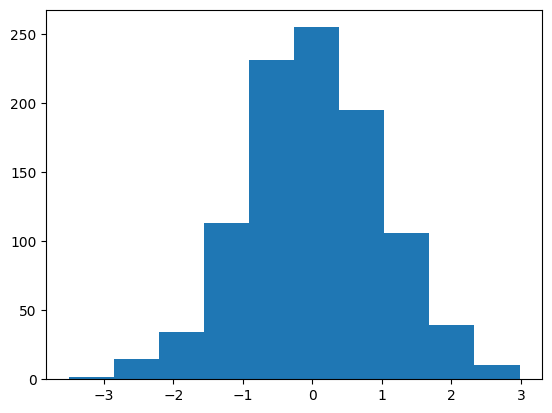

In [ ]:
plt.hist(X_1[:, 1])

In [ ]:
# Form the matrix containing all features
X = np.concatenate((X_1, X_2))

### EM Algorithm

$I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}$ <br/>
$ c = 2$  <br/><br/>

$ I \times c = C $

In [ ]:
# Initialize the prior parameters
init_means  = [
    np.array([-1, -1]),
    np.array([2, 2])
]

init_covariance = [np.eye(n_features)] * n_components
init_weights = [0.5, 0.5]

In [ ]:
def E_step(X, means, covariance_matrices, weights):
  n_samples = X.shape[0]
  n_components = len(means)
  responsibilities = np.zeros((n_samples, n_components))
  # Go through every cell matrix
  for i in range(n_samples):
    for j in range(n_components):
      responsibilities[i, j] = weights[j] * multivariate_normal.pdf(X[i], means[j], covariance_matrices[j])
    responsibilities[i] /= np.sum(responsibilities[i])
  return responsibilities


# M-step: Update the parameters (means, covariances, weights)
def M_step(X, responsibilities):
    n_samples, n_components = responsibilities.shape
    n_features = X.shape[1]

    # Update the means
    means = np.zeros((n_components, n_features))
    for j in range(n_components):
        for i in range(n_samples):
            means[j] += responsibilities[i, j] * X[i]
        means[j] /= np.sum(responsibilities[:, j])

    # Update the covariances
    covariances = np.zeros((n_components, n_features, n_features))
    for j in range(n_components):
        for i in range(n_samples):
            diff = X[i] - means[j]
            covariances[j] += responsibilities[i, j] * np.outer(diff, diff)
        covariances[j] /= np.sum(responsibilities[:, j])

    # Update the weights
    weights = np.mean(responsibilities, axis=0)

    return means, covariances, weights

In [ ]:
# Expectation-Maximization (EM) algorithm
means = init_means
covariances = init_covariance
weights = init_weights

for _ in range(10):  # Run the algorithm for a fixed number of iterations
    # E-step: Update the responsibilities
    responsibilities = E_step(X, means, covariances, weights)

    # M-step: Update the parameters
    means, covariances, weights = M_step(X, responsibilities)

print("Estimated Means:")
print(means)
print("Estimated Covariances:")
print(covariances)
print("Estimated Weights:")
print(weights)

Estimated Means:
[[-0.20336134 -0.19298192]
 [ 0.59459483  0.68661213]]
Estimated Covariances:
[[[ 0.9718367  -0.09051901]
  [-0.09051901  0.90509662]]

 [[ 0.79466154 -0.1708392 ]
  [-0.1708392   0.70127224]]]
Estimated Weights:
[0.74790135 0.25209865]
